In [1]:
import pandas as pd

import numpy as np

import matplotlib as mpl

import matplotlib.pyplot as plt

#------------------------------------#

from scipy.stats import zscore

import seaborn as sns

import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')
 
#-------------------------------------#

from sklearn import linear_model

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
 

In [7]:
dfCredito =pd.read_excel("DataSet_ETL.xlsx")

dfCredito.head(2)

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month (Y)
0,0,120000,female,university,2,26,-1,2,-1,-1,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
1,1,90000,female,university,2,34,-1,-1,-1,-1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default


In [3]:
dfCredito.describe()

,Unnamed: 0,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,2395.00000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,...,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.00000,2395.000000,2395.000000,2395.000000,2395.000000
mean,1197.00000,165895.615866,1.580376,35.424635,-0.398330,-0.533194,-0.533194,-0.648852,-0.659708,-0.644259,...,45530.736952,41561.739875,40009.644259,38813.640501,5551.259708,5221.94238,4857.470981,4893.472234,4987.059290,5152.078914
std,691.52127,129486.412237,0.525569,9.451436,1.163708,1.159774,1.192449,1.066245,1.039661,1.056252,...,69641.208715,68125.999290,64335.299038,65476.984074,13704.340652,14619.68646,22160.690090,14254.694001,16899.445034,20080.576190
min,0.00000,10000.000000,0.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-9850.000000,-7905.000000,-28335.000000,-339603.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,598.50000,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2309.000000,1864.500000,1529.000000,1018.000000,1000.000000,586.00000,249.500000,244.500000,251.000000,0.000000
50%,1197.00000,140000.000000,2.000000,34.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,19476.000000,17919.000000,17596.000000,15829.000000,2120.000000,2000.00000,1443.000000,1500.000000,1500.000000,1329.000000
75%,1795.50000,230000.000000,2.000000,41.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,56238.500000,49309.000000,48538.500000,47398.000000,5003.500000,4923.50000,4000.000000,4000.000000,4000.000000,4000.000000
max,2394.00000,1000000.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,...,548020.000000,891586.000000,927171.000000,961664.000000,239104.000000,285138.00000,896040.000000,205000.000000,332000.000000,528666.000000


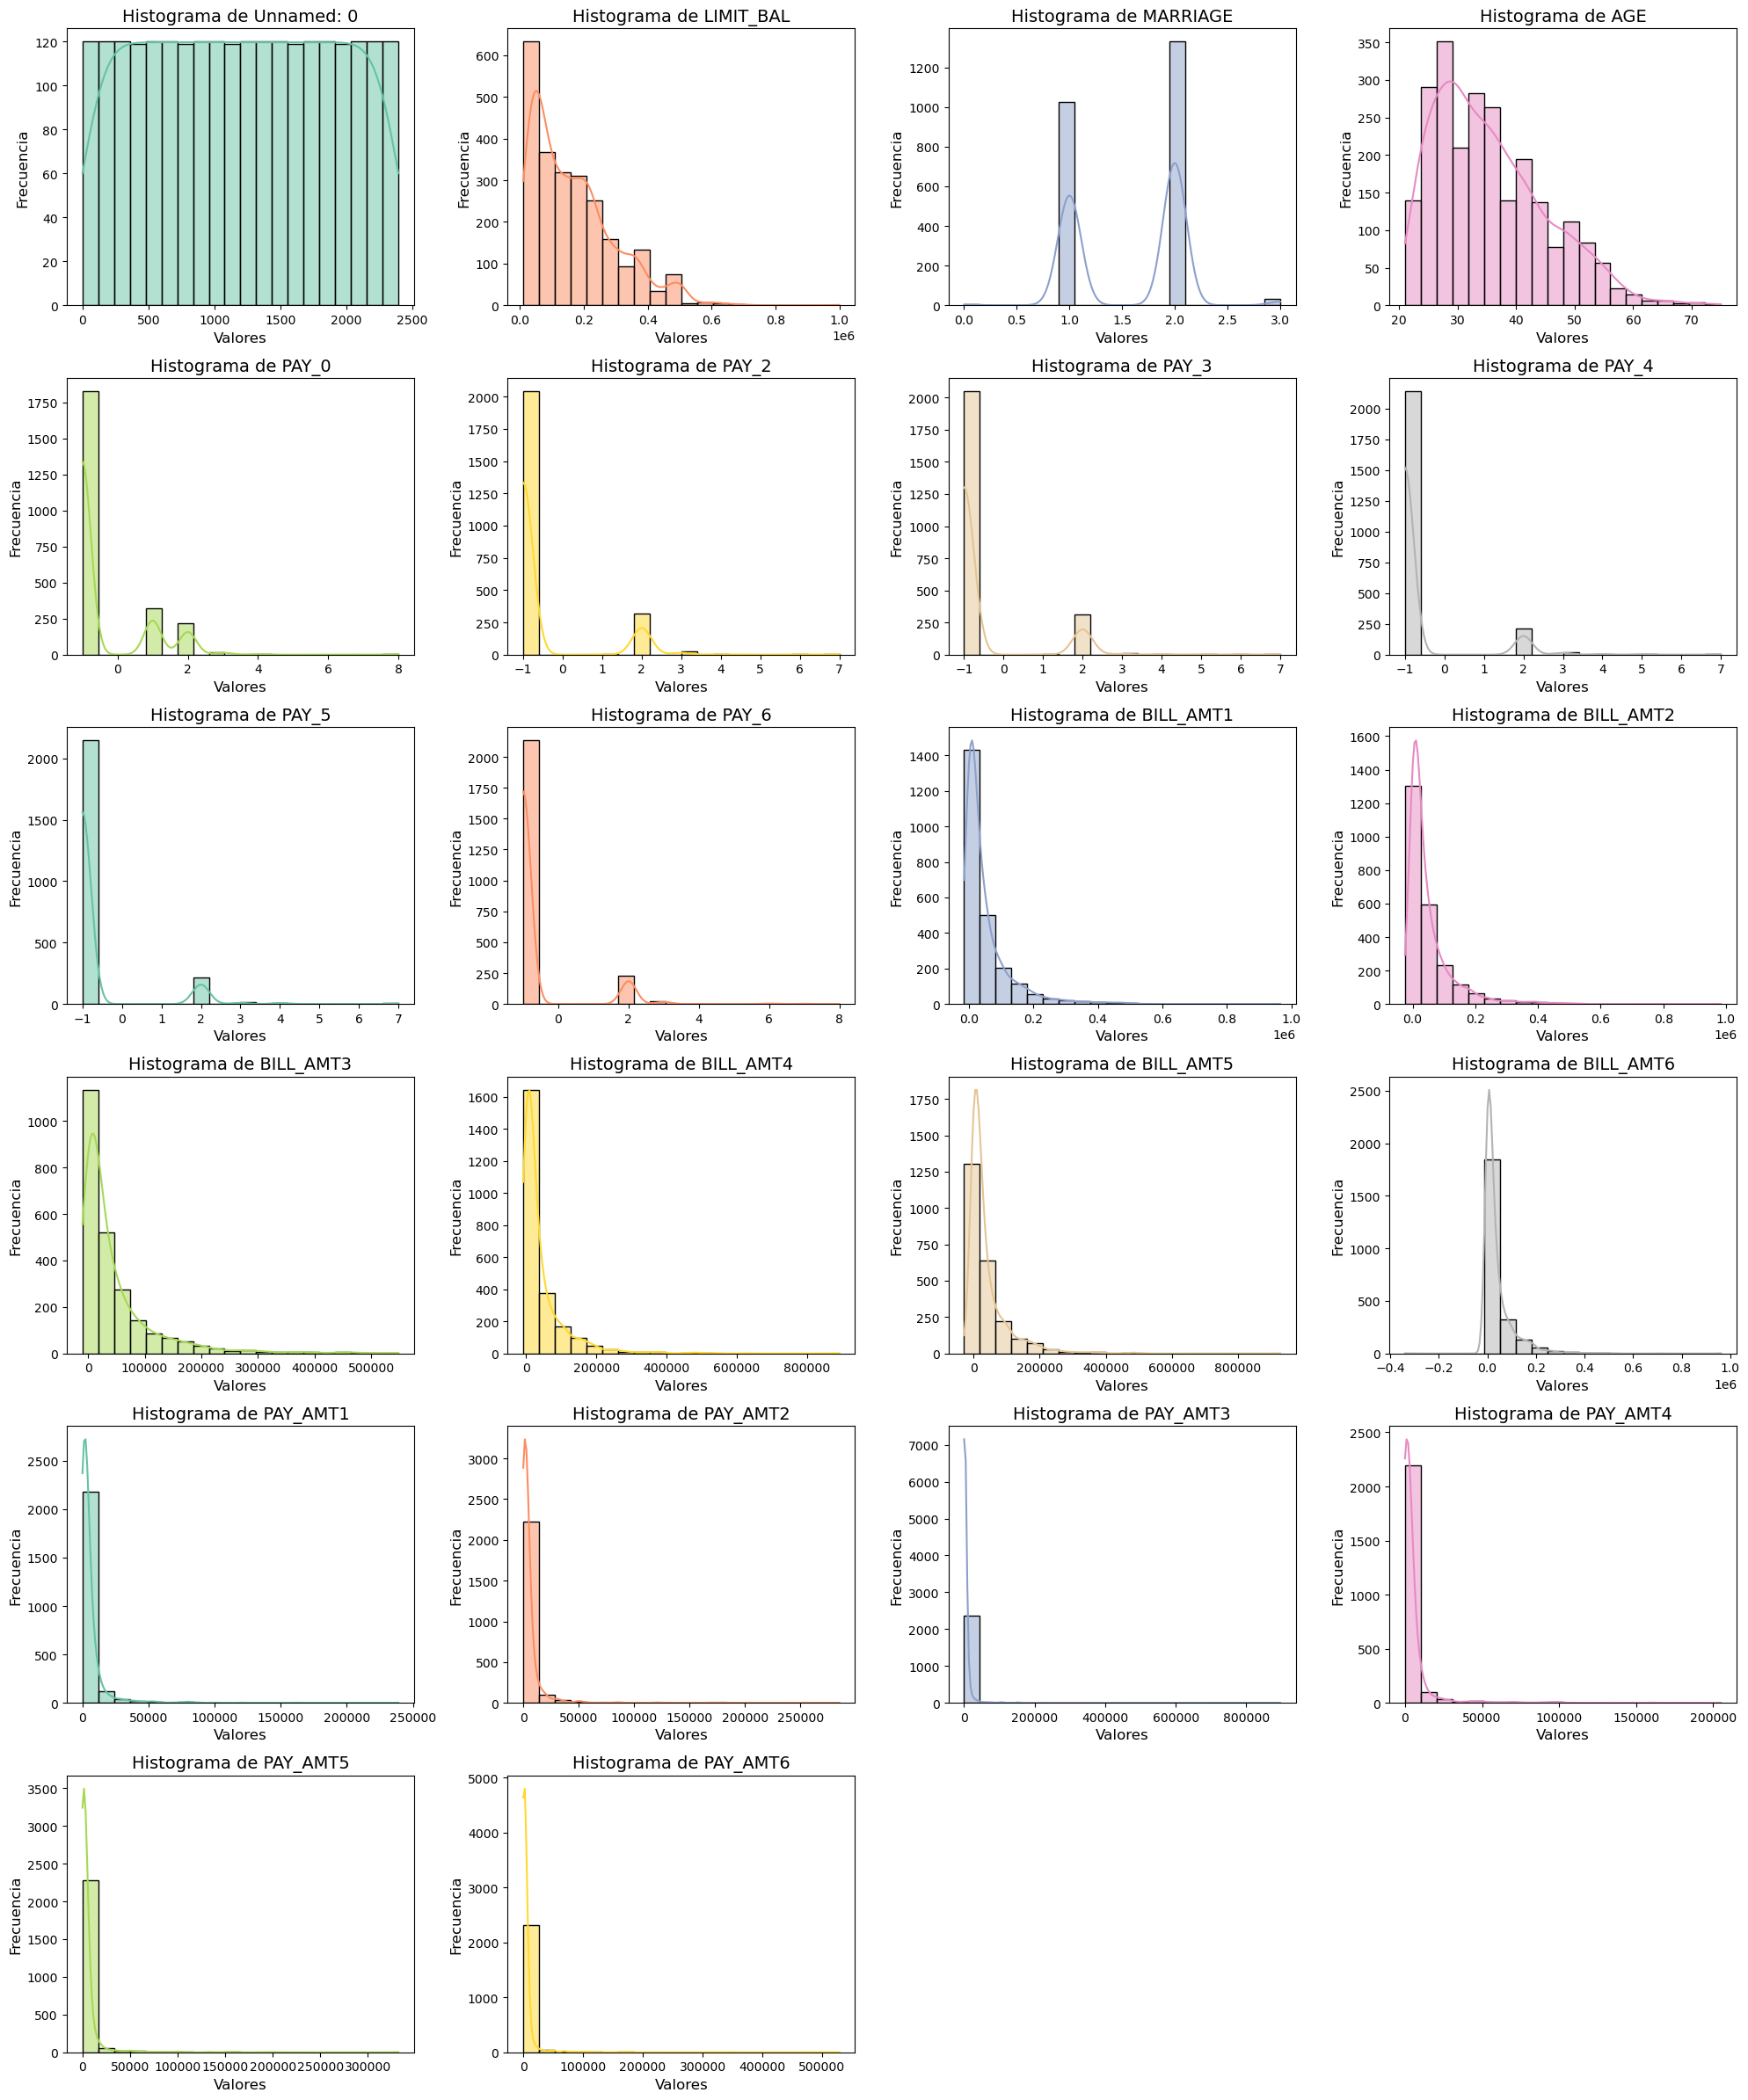

In [5]:
#filtrar las columnas numericas
dfNumerico=dfCredito.select_dtypes(include="number")

#Configurar tamano de las graficas
num_vars = len(dfNumerico.columns)
cols=4
rows= (num_vars // cols)+(num_vars % cols>0)

#Graficar
plt.figure(figsize=(20,rows*4))

#Se utiliza una paleta de sistema
paleta= sns.color_palette("Set2", num_vars)

#Crear histogramas
for i, columna in enumerate (dfNumerico.columns, 1):
    plt.subplot(rows, cols,i)
    sns.histplot(dfNumerico[columna].dropna(), kde=True, color=paleta[i-1], bins=20)
    plt.title(f"Histograma de {columna}", fontsize=14)
    plt.xlabel("Valores", fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)

#Ajustar el espcaio para mostrar grafico
plt.tight_layout()
plt.show()
    

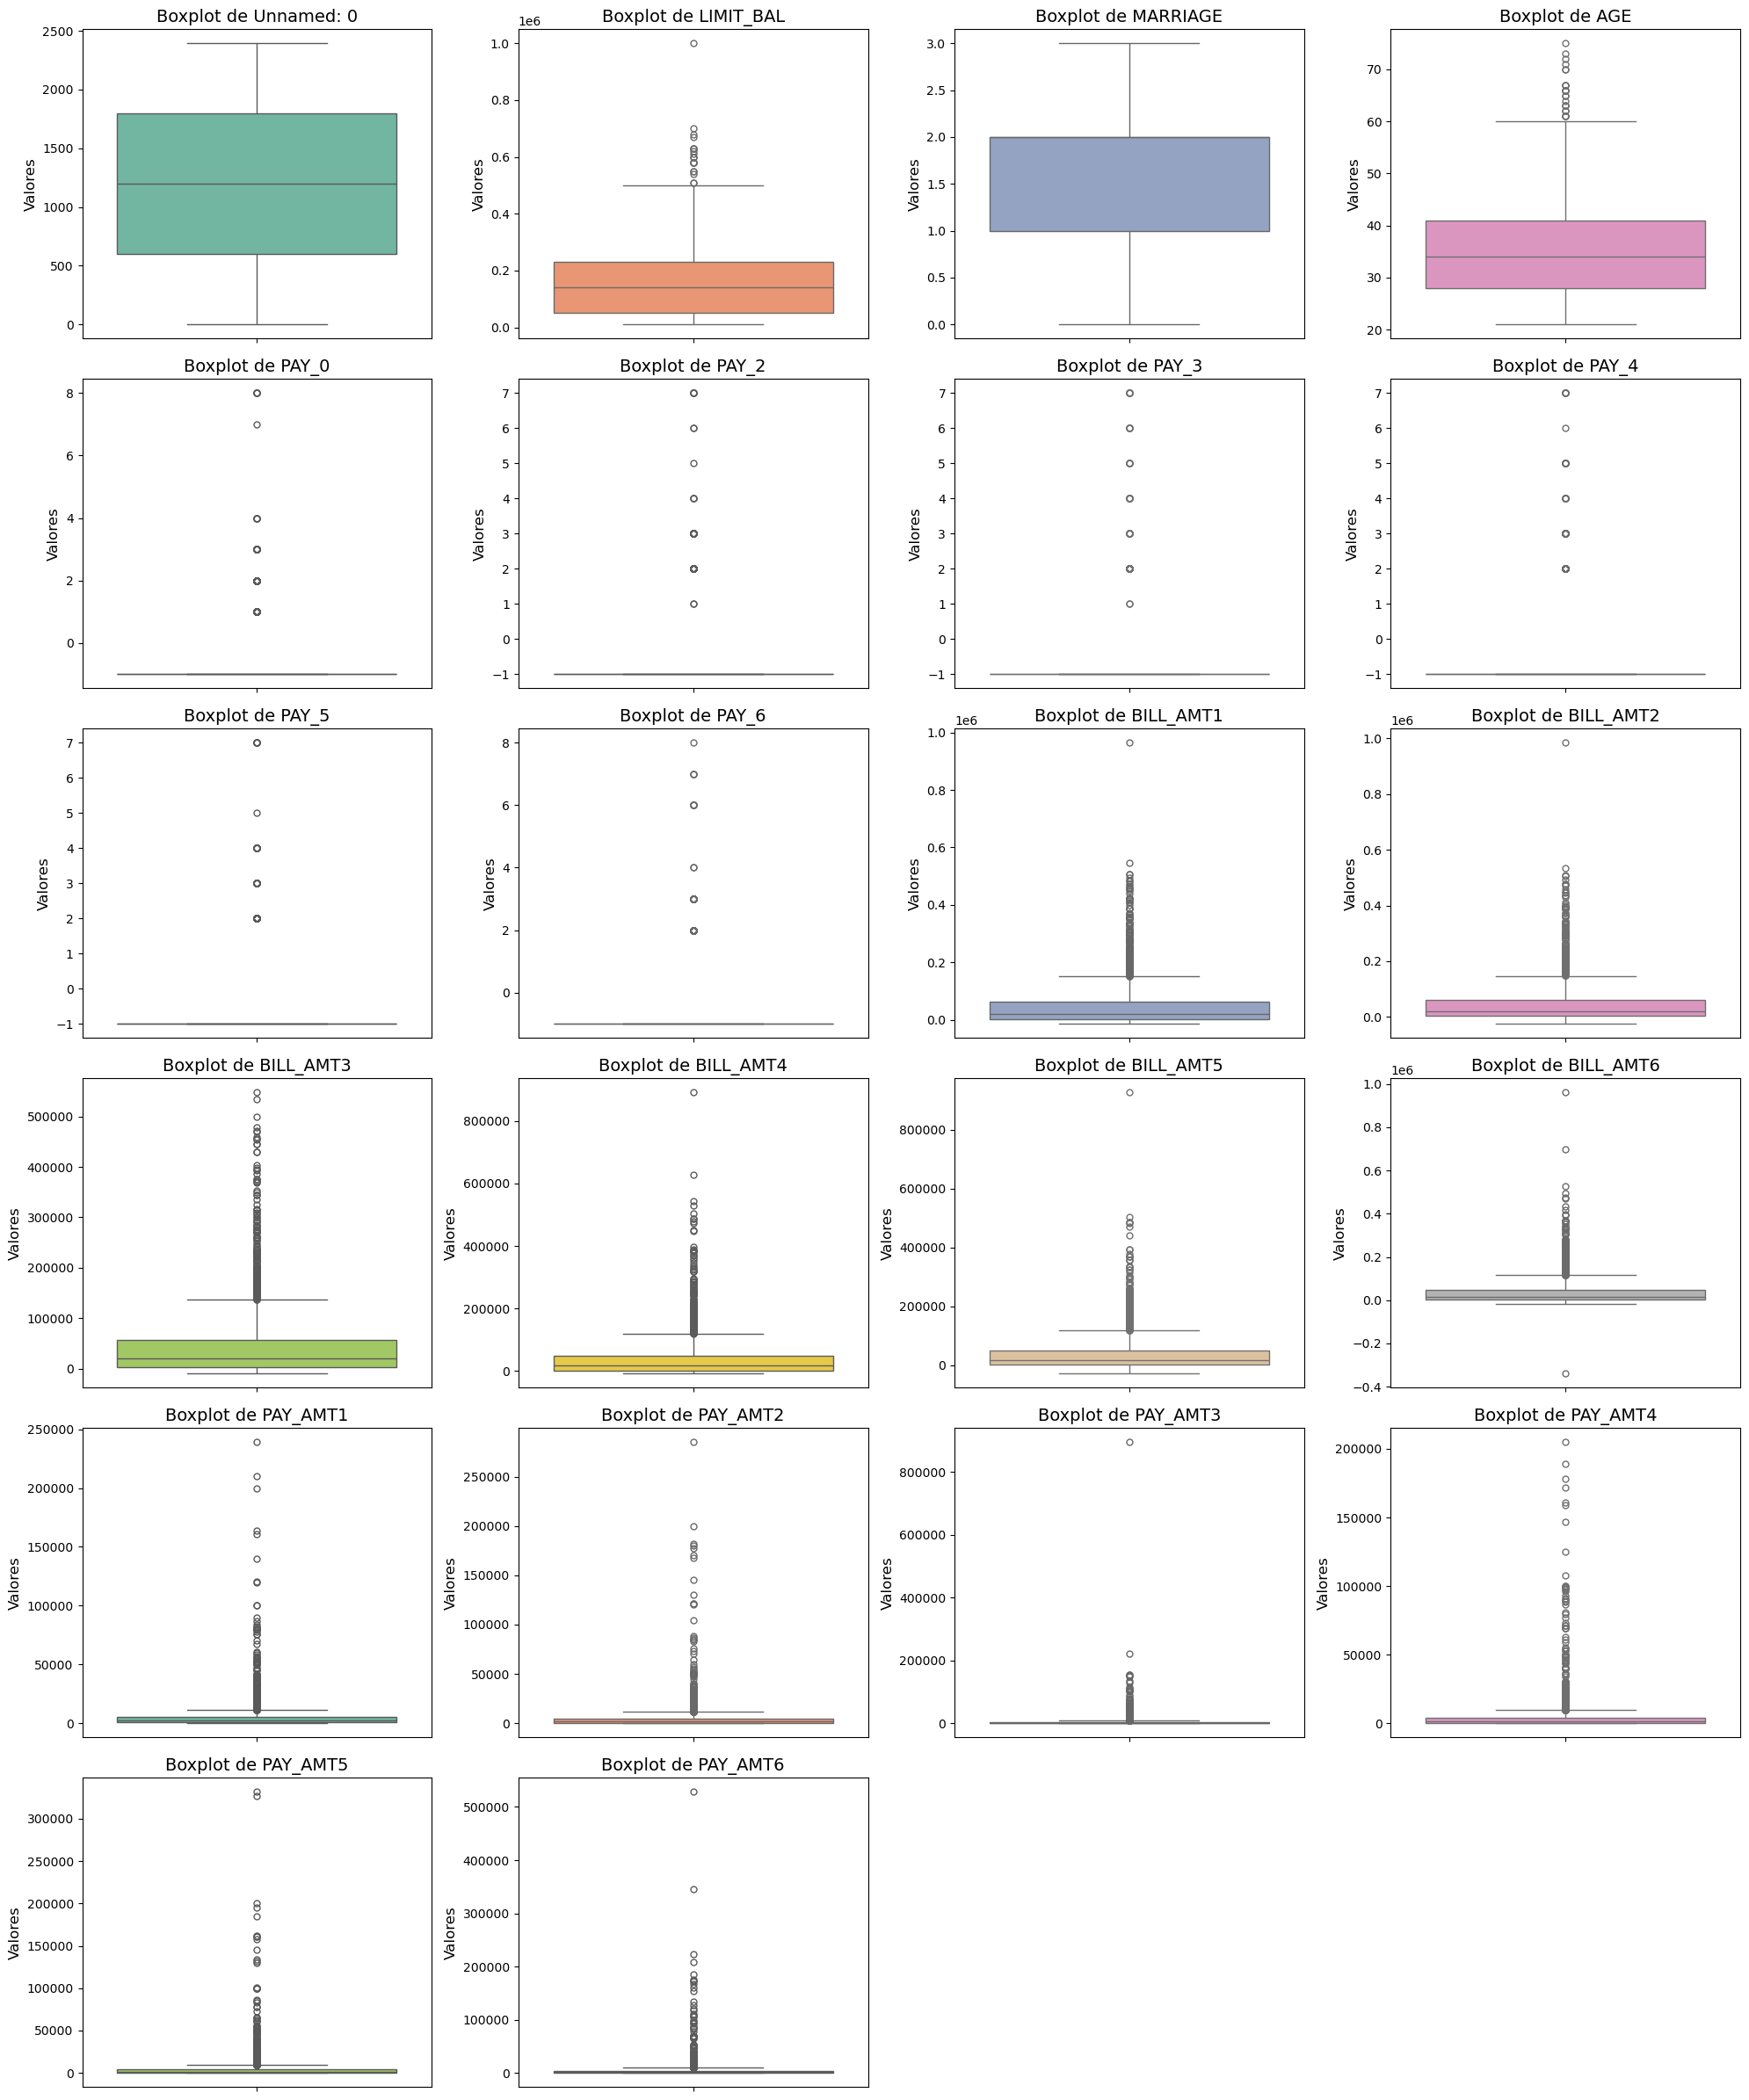

In [8]:
#Configurar tamano de las graficas
num_vars = len(dfNumerico.columns)
cols=4
rows= (num_vars // cols)+(num_vars % cols>0)

#Graficar
plt.figure(figsize=(20,rows*4))

#Se utiliza una paleta de sistema
paleta= sns.color_palette("Set2", num_vars)

#Crear histogramas
for i, columna in enumerate (dfNumerico.columns, 1):
    plt.subplot(rows, cols,i)
    sns.boxplot(y=dfNumerico[columna], color=paleta[i-1], fliersize=5)
    plt.title(f"Boxplot de {columna}", fontsize=14)
    plt.ylabel("Valores", fontsize=12)

#Ajustar el espcaio para mostrar grafico
plt.tight_layout()
plt.show()
    

In [9]:
def IQR(df, column):
    #Calcular el IQR
    iqr75 = df[column].quantile(0.75)
    iqr25 = df[column].quantile(0.25)
 
    iqr = iqr75 - iqr25
 
    #Calcular los limintes inferiores y superiores
    upper = iqr75 + (1.5 * iqr)
    lower = iqr25 - (1.5 * iqr)
 
    #Filtrar valores que estan sobre el lim superios y bajo el lim inferior
    dfFiltrado = df[(df[column] >= lower) & (df[column] <= upper)]
 
    return dfFiltrado
 
dfCredito = IQR(dfCredito, 'LIMIT_BAL')
dfCredito = IQR(dfCredito, 'AGE')
dfCredito = IQR(dfCredito, 'BILL_AMT1')
dfCredito = IQR(dfCredito, 'BILL_AMT2')
dfCredito = IQR(dfCredito, 'BILL_AMT3')
dfCredito = IQR(dfCredito, 'BILL_AMT4')
dfCredito = IQR(dfCredito, 'BILL_AMT5')
dfCredito = IQR(dfCredito, 'BILL_AMT6')
dfCredito = IQR(dfCredito, 'PAY_AMT1')
dfCredito = IQR(dfCredito, 'PAY_AMT2')
dfCredito = IQR(dfCredito, 'PAY_AMT3')
dfCredito = IQR(dfCredito, 'PAY_AMT4')
dfCredito = IQR(dfCredito, 'PAY_AMT5')
 
print ("Valores atipicos filtrados")

Valores atipicos filtrados


In [10]:
%matplotlib inline